<a href="https://colab.research.google.com/github/Dargesen004/GithubLearning/blob/main/BaigiamasisdarbasJD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sveiki, sio mano baigiamojo Python darbo tikslas pritaikyti igytas zinias per Python paskaitas. Pasirinktas duomenu rinkinys (dataset) tai naudotu parduodamu automobiliu sarasas. Tikslas: bendra duomenu analize ir vizualizavimas naudojant Pyhton bibliotekas, taip pat
 (kad ir megejiskas :) ) Machine Learning panaudojimas.

Taigi pradedu. importuoju bibliotekas

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
%matplotlib inline

Isikeliu duomenis ir pasirenku pirmasias 100 eiluciu.

In [167]:
df = pd.read_csv('/content/used_car_listings.csv')
df.head(100)

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,6SW9VMTP9P63J9839,Skoda,Kushaq,2020,Titanium,Hatchback,CNG,Automatic,73820,7645.0,excellent,"横浜市旭区, Kyoto, Japan",Private Party,"Backup Camera, Bluetooth, Heated Seats, Keyles..."
96,97,2800PWN05M9ZM3827,Mahindra,Scorpio,2015,EX,Convertible,Petrol,Automatic,84885,3569.0,excellent,"North Rosieberg, SCT, UK",Private Party,"Adaptive Cruise Control, Alloy Wheels, Backup ..."
97,98,EHK7122485LSM0295,Mercedes-Benz,GLA,2017,Performance,Hatchback,Petrol,CVT,107550,4382.0,good,"East Williamstad, NT, Australia",Dealer,"Adaptive Cruise Control, Bluetooth, Heated Sea..."
98,99,XK368FXW7VJTN9264,Honda,CR-V,2018,LT,Convertible,Hybrid,Manual,104491,9040.0,good,"八街市, Aichi, Japan",Private Party,"Apple CarPlay, Heated Seats, Lane Keep Assist,..."


Tikrinu stulpeliu informacija ir ar yra null reiksmiu.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    2068 non-null   int64  
 1   vin           2068 non-null   object 
 2   make          2068 non-null   object 
 3   model         2068 non-null   object 
 4   year          2068 non-null   int64  
 5   trim          1824 non-null   object 
 6   body_type     2068 non-null   object 
 7   fuel_type     2068 non-null   object 
 8   transmission  2068 non-null   object 
 9   mileage       2068 non-null   int64  
 10  price         2068 non-null   float64
 11  condition     2022 non-null   object 
 12  location      2068 non-null   object 
 13  seller_type   2068 non-null   object 
 14  features      1917 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 242.5+ KB


In [169]:
df.describe()

,listing_id,year,mileage,price
count,2068.000000,2068.000000,2068.000000,2068.000000
mean,1034.500000,2016.975822,115626.364603,9182.621857
std,597.124498,4.610981,80971.112603,9964.093618
min,1.000000,2005.000000,0.000000,1140.000000
25%,517.750000,2014.000000,57683.250000,2323.750000
50%,1034.500000,2017.000000,99212.000000,5448.500000
75%,1551.250000,2020.000000,159291.500000,11946.750000
max,2068.000000,2025.000000,418428.000000,72641.000000


Kaip matome rasta null reiksmiu, tad jas pasaliname .

In [170]:
df.isnull().sum()

,0
listing_id,0
vin,0
make,0
model,0
year,0
trim,244
body_type,0
fuel_type,0
transmission,0
mileage,0


In [171]:
df = df.dropna()

pasitikrinimas paciam sau ar null reiksmes pasalintos

In [172]:
df.isnull().sum()

,0
listing_id,0
vin,0
make,0
model,0
year,0
trim,0
body_type,0
fuel_type,0
transmission,0
mileage,0


In [173]:
df = df.drop(columns=["listing_id", "vin", "trim", "location", "seller_type"])

Pasalinu mano manymu nereikalingus stulpelius.

In [174]:
df

,make,model,year,body_type,fuel_type,transmission,mileage,price,condition,features
1,Nissan,Rogue,2024,Sedan,Hybrid,Automatic,16109,19480.0,good,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,Hyundai,i20,2018,Crossover,Petrol,Automatic,173239,4556.0,good,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,Kia,Sportage,2023,Hatchback,Diesel,CVT,36810,11536.0,fair,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,Kia,Seltos,2020,Pickup,Diesel,Automatic,87749,14098.0,good,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."
5,Mercedes-Benz,GLA,2019,Crossover,Electric,CVT,60853,17137.0,excellent,"Apple CarPlay, Backup Camera, Blind Spot Monit..."
...,...,...,...,...,...,...,...,...,...,...
2063,Skoda,Kushaq,2023,Pickup,Petrol,Automatic,24566,34696.0,like new,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,Mahindra,Scorpio,2016,SUV,Diesel,Automatic,122459,2642.0,excellent,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,Audi,A6,2018,Hatchback,Diesel,DCT,120452,7093.0,good,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,Skoda,Kushaq,2021,MPV,Petrol,Manual,57043,11296.0,excellent,"Backup Camera, Panoramic Roof, Parking Sensors..."


In [175]:
df["make"].unique()

array(['Nissan', 'Hyundai', 'Kia', 'Mercedes-Benz', 'Tata', 'Chevrolet',
       'Toyota', 'Skoda', 'Audi', 'Honda', 'Maruti', 'Ford', 'BMW',
       'Tesla', 'Volkswagen', 'Mahindra'], dtype=object)

Idomumo delei pasiziuriu kiek unikaliu gamintoju yra duomenu rinkinyje.

Duomenu analizavimui atsispausdinu keleta mano manymu svarbiu diagramu.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Nissan'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Kia'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Skoda'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Maruti'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Tesla'),
  Text(14, 0, 'Volkswagen'),
  Text(15, 0, 'Mahindra')])

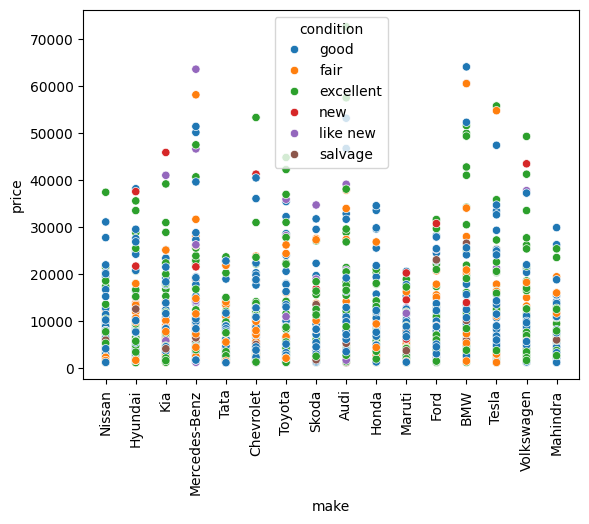

In [176]:
sns.scatterplot(data = df, x = "make" , y = "price", hue = "condition")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Nissan'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Kia'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Skoda'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Maruti'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Tesla'),
  Text(14, 0, 'Volkswagen'),
  Text(15, 0, 'Mahindra')])

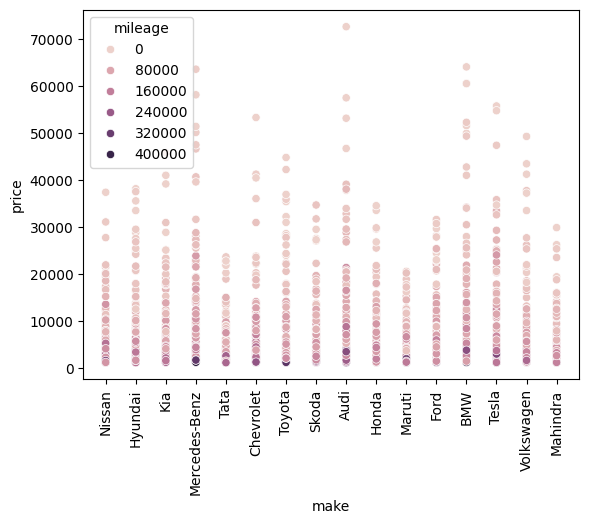

In [177]:
sns.scatterplot(data = df, x = "make" , y = "price", hue = "mileage")
plt.xticks(rotation=90)

/tmp/ipython-input-3549963969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = "price", x = "make", palette = "bright")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Nissan'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Kia'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Skoda'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Maruti'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Tesla'),
  Text(14, 0, 'Volkswagen'),
  Text(15, 0, 'Mahindra')])

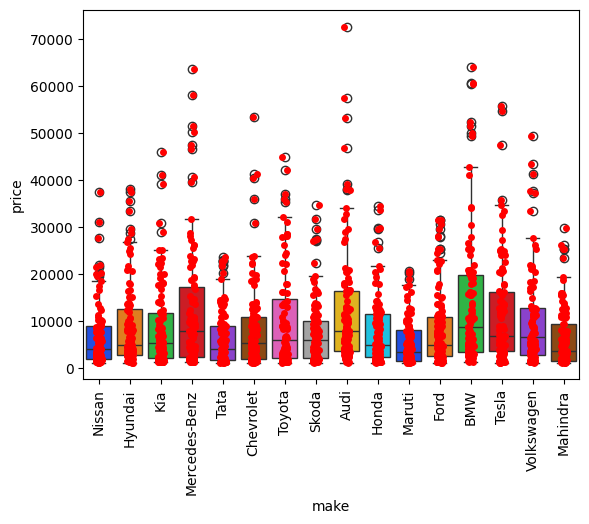

In [178]:
sns.boxplot(data = df, y = "price", x = "make", palette = "bright")
sns.stripplot(data = df, y = "price", x = "make", color = "Red")
plt.xticks(rotation=90)

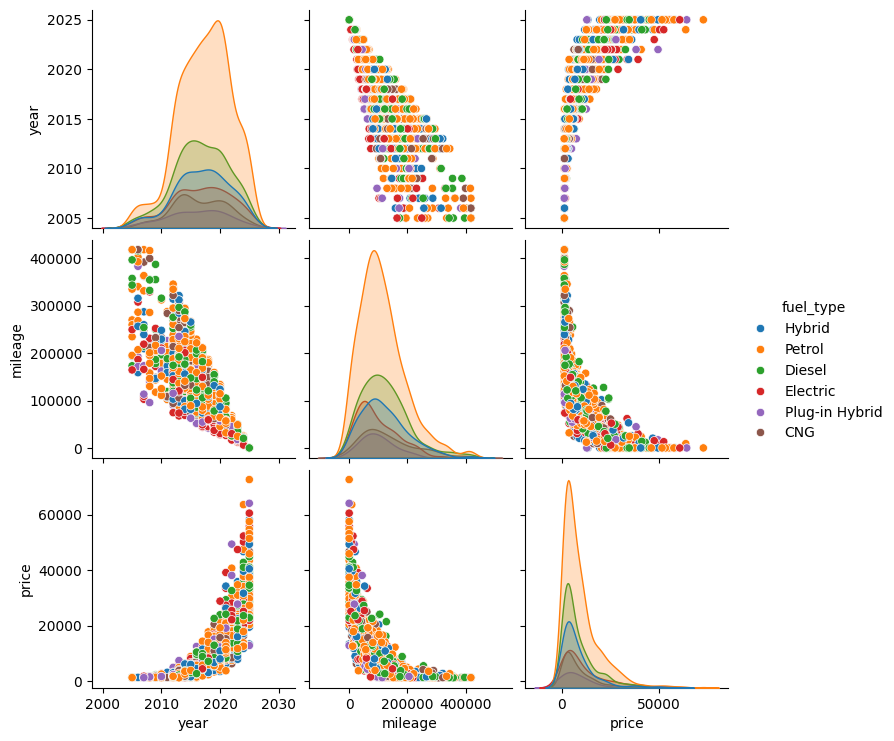

In [179]:
sns.pairplot(data = df, hue="fuel_type")

Pasiziuriu kaip koreliuoja kaina tarp pagaminimo metu ir ridos

In [180]:

df_corr = df.corr(numeric_only=True)

<Axes: >

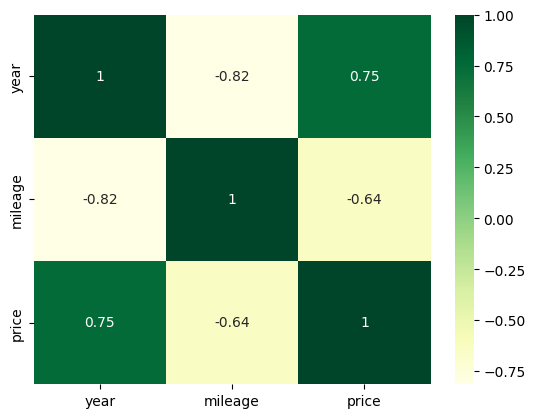

In [181]:
sns.heatmap(df_corr, annot=True, cmap='YlGn')

Machine learning pagalba bandau nuspeti kiek vidutiniskai kiekviena papildoma mylia mazina automobilio kaina .

In [182]:
y = df["price"]
X = df[['mileage']]


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Predicted Average price decrease in every extra mile:", model.coef_[0])
y_pred = model.predict(X_test)

Predicted Average price decrease in every extra mile: -0.07682939591741782


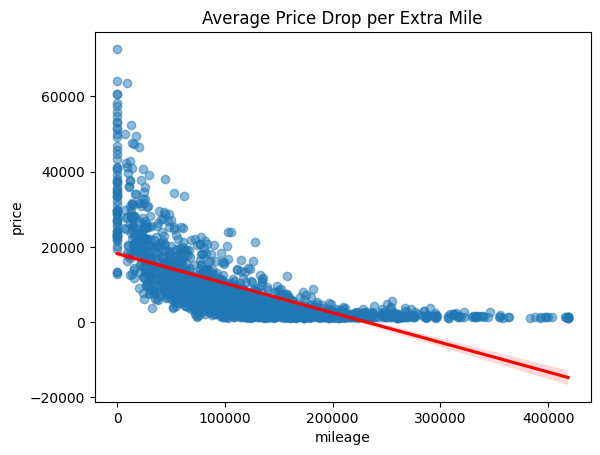

In [186]:
sns.regplot(data=df, x="mileage", y="price", scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Average Price Drop per Extra Mile")
plt.show()

In [187]:
y = df["price"]
X = df[['year']]


Susukuriame nauja stulpeli kuriame paskaiciuosime koks automobilio amzius. Tai pades bandand nuspeti koks butu vidutinis automobilio kainos kritimas jam "senejant"

In [188]:
df["age"] = 2025 - df["year"]

In [189]:
X = df[["age"]]
y = df["price"]


Velgi Machine Learning pagalba bandome nuspeti koks turetu buti vidutinis kainos kritimas pagal automobilio amziu.

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)

print("Predicted Average Price drop per year:", model.coef_[0])

Predicted Average Price drop per year: -1614.8488079022236


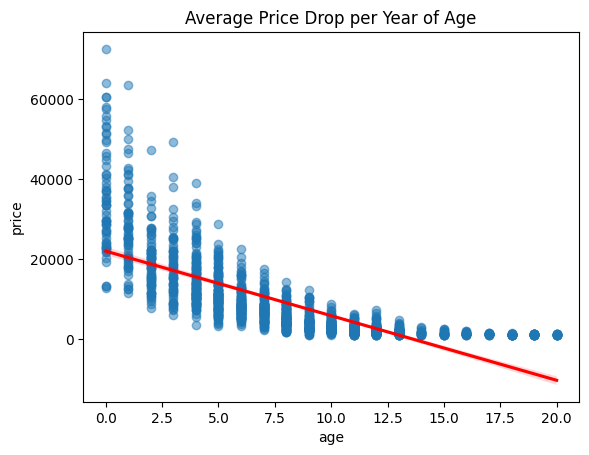

In [191]:
sns.regplot(data=df, x="age", y="price", scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Average Price Drop per Year of Age")
plt.show()

Apibendrinimui: Apskaiciuoti numatomi vidutiniai kainos mazejimai pagal kiekviena papildoma mylia ir amziu(Kiek turetu vidutiniskai kristi verte pasenus vieneriais metais).Mano nuomone apie si projekta: Manau sis darbas padejo labiau suprasti ko reikia duomenu analitikoje. Ziurint is analitines puses reiketu daugiau duomenu datasete kad Machine learning generuotu kuo tikslesnius rezultatus. Pvz: kadangi datasetas naudotu parduodamu automobiliu sarasas tai reiktu duomenu kiek kainuoja naujas tokios pacios markes automobilis. Taip pat sukurti segmentus "prabangius" , "vidutinius" ir "pigius" automobilis, pagal marke ir pan. Tada Modelis galetu geriau nuspeti kainu kritima. Bendrai sis darbas tai smagi patirtis ir savo ziniu ivertinimas.
